<a href="https://colab.research.google.com/github/Suhit97/Sentiment-Analysis/blob/master/Preprocessing_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Sentiment/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


# Importing datasets

In [ ]:
!kaggle datasets download -d kazanova/sentiment140 -p /content/gdrive/My\ Drive/Sentiment

 99% 80.0M/80.9M [00:02<00:00, 31.8MB/s]
100% 80.9M/80.9M [00:02<00:00, 33.0MB/s]


In [56]:
df = pd.read_csv('/content/gdrive/My Drive/Sentiment/sentiment140.zip', encoding ="ISO-8859-1" ,
                 header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [57]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user_id    1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [20]:
df.describe(include = 'O')

,date,query,user_id,text
count,1600000,1600000,1600000,1600000
unique,774363,1,659775,1581466
top,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,20,1600000,549,210


In [23]:
# Printing the length of the dataset
print("Dataset length : {}".format(len(df)))

print("Dataset shape : {}".format(df.shape))


Dataset length : 1600000
Dataset shape : (1600000, 6)


In [24]:
#Checking for null values
df.isnull().any()

sentiment    False
id           False
date         False
query        False
user_id      False
text         False
dtype: bool

In [25]:
df.isnull().sum()

sentiment    0
id           0
date         0
query        0
user_id      0
text         0
dtype: int64

In [27]:
# Checking the target values
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

### The tweets have been annotated (0 = Negative, 4 = Positive) and they can be used to detect sentiment.

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

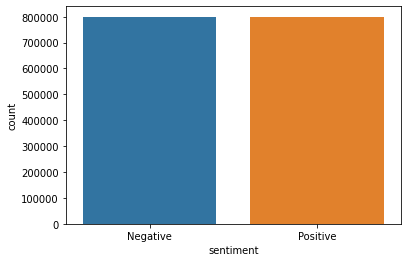

In [30]:
g = sns.countplot(df['sentiment'], data=df)
g.set_xticklabels(["Negative", "Positive"], rotation=0)

In [32]:
df.user_id.value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
AndiBrown            1
Stephie1938          1
hollee77             1
frau2x               1
pblair12             1
Name: user_id, Length: 659775, dtype: int64

# Preprocessing

## Cleaning the Text column

In [39]:
import re
import string

In [58]:
def remove_noise(text):
    # Dealing with Punctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('@\S+|https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    #Only this one can be used
    #text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', '', text)
    return text

In [59]:


# Applying the remove_noise function on the dataset
df['text'] = df['text'].apply(lambda x : remove_noise(x))
#Converting the uppercase letters to lower case
df['text'] = df['text'].apply(lambda x : x.lower())
df.head()


,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats a bummer you shoulda got david ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball managed to sa...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i he...


In [61]:
#Saving the cleaned one for future use
df.to_csv('/content/gdrive/My Drive/Cleaned_text.csv' , header=False)

## making 0 --> "Negative",           4-->"Positive"


In [62]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,id,date,query,user_id,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats a bummer you shoulda got david ...
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball managed to sa...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i he...


Text(0.5, 1.0, 'Sentiment Data Distribution')

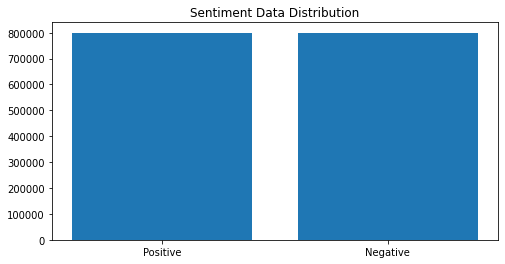

In [54]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [55]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,id,date,query,user_id,text
1168672,Positive,1980177493,Sun May 31 05:57:09 PDT 2009,NO_QUERY,anni13,home sweet homeloud musicand fast internetits ...
140450,Negative,1881039533,Fri May 22 03:23:26 PDT 2009,NO_QUERY,dancave,we had a big red tea pot but it was claimed i...
789694,Negative,2325456822,Thu Jun 25 05:29:10 PDT 2009,NO_QUERY,Kimberlytweetz,ok bye p almost updates cool bye twithearts
1529068,Positive,2177502602,Mon Jun 15 06:13:12 PDT 2009,NO_QUERY,dermdoc,gee thanks
801207,Positive,1468038035,Mon Apr 06 23:23:15 PDT 2009,NO_QUERY,BostinBloke,good morning you sound very chirpy
1558211,Positive,2185779636,Mon Jun 15 17:53:38 PDT 2009,NO_QUERY,MissCurlyGirl,ah just missing my hubby wish he would come i...
163503,Negative,1958062208,Fri May 29 02:31:53 PDT 2009,NO_QUERY,jasperwagenmans,tired of hearing stories about everybody going...
760707,Negative,2296910833,Tue Jun 23 09:46:37 PDT 2009,NO_QUERY,babyqurl,im sooo cold
855777,Positive,1573634079,Tue Apr 21 02:06:16 PDT 2009,NO_QUERY,kristanjcaryl,i frikkin love that battered chix wrapped in...
1313310,Positive,2013767835,Tue Jun 02 23:31:26 PDT 2009,NO_QUERY,lammieboii,im procrastinating wake me up at


### cleaning stopwords and lemmatization or stemming







In [63]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [64]:
def preprocess(text, stem=False):
  # already done
  #text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [65]:
df.text = df.text.apply(lambda x: preprocess(x))

In [69]:
df['text'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                             behaving im mad cant see
Name: text, dtype: object

In [67]:
#Saving the cleaned one for future use
df.to_csv('/content/gdrive/My Drive/Cleaned_text2.csv' , header=False)

### Positive

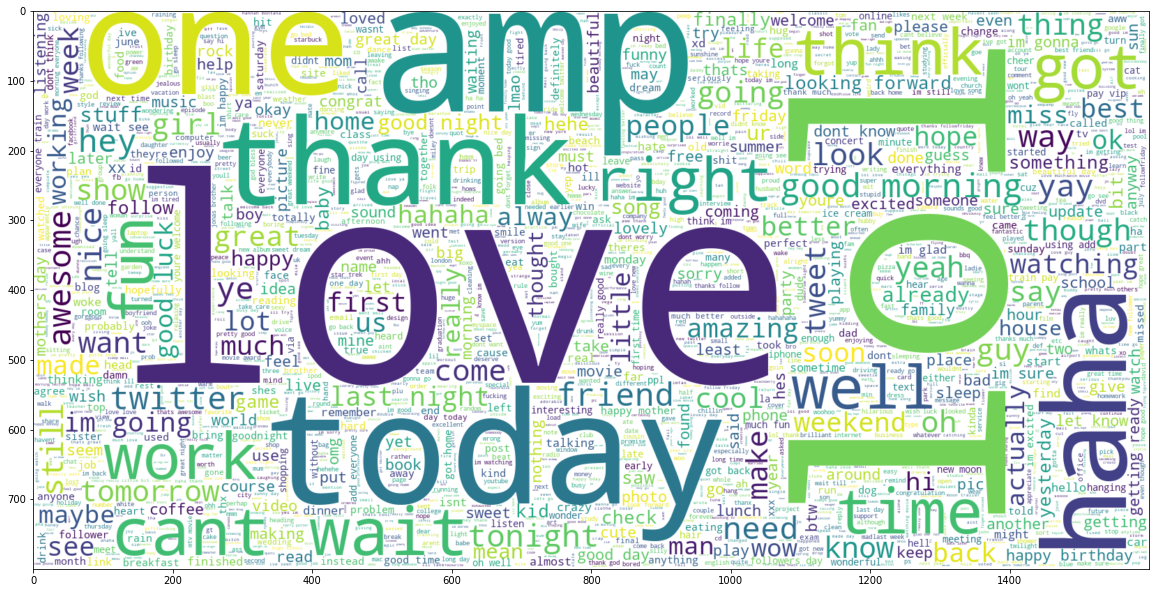

In [70]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color='white', max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

### Negative

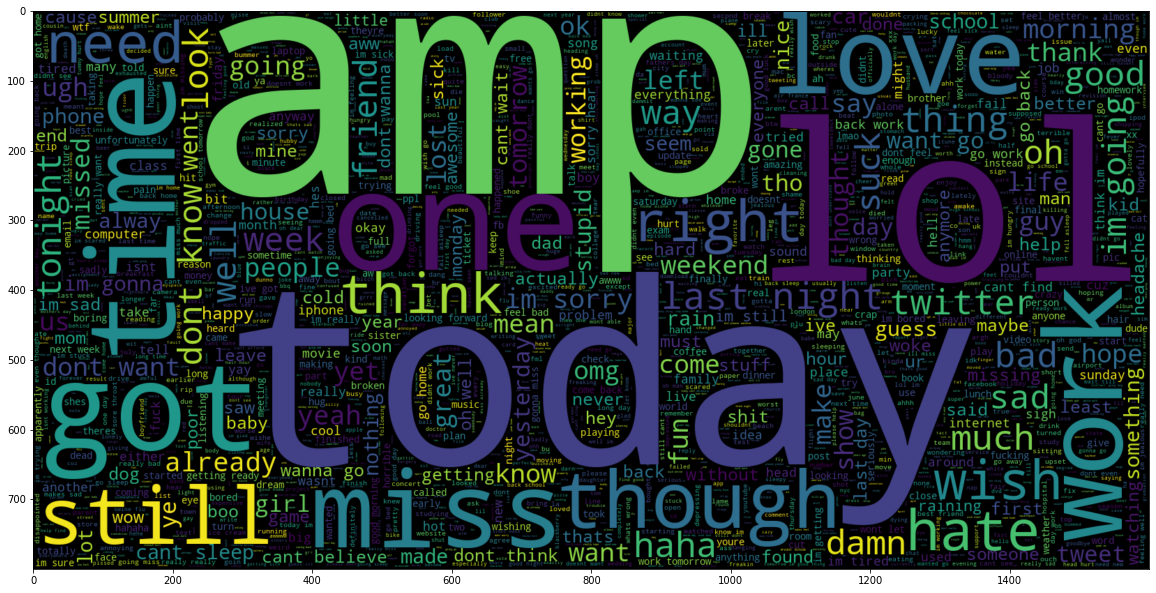

In [72]:
plt.figure(figsize = (20,20)) 
wc = WordCloud( max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')